



# **Tarea 03 - Modelos Matemáticos**
**Profesor:** Jorge Mauricio Ruiz Vera




---







**Autores:**

*   Juan Diego Murcia Porras
*   Carlos Enrique Nosa Guzman
*   Brayan Alejandro Romero Castro



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy
from tabulate import tabulate
import random
from matplotlib import colors
from numpy import linalg as LA
from sympy.abc import d,r,m,h,p
from scipy.stats import norm
import scipy
import cvxpy as cp
import random
from matplotlib import colors
from scipy.optimize import optimize
from scipy.optimize import fsolve

##Punto 1

Una cuerda de un circulo es el segmento de recta cuyos dos extremos estan sobre la circunferencia. Suponga que una cuerda es trazada aleatoriamente en el circulo unitario.¿Cuál es la probabilidad que su longitud sea mayor que $\sqrt{3}$? notese que una cuerda de un circulo es perpendicular al radio que contiene al punto medio $M$ de la cuerda. Podemos describir cada cuerda de las siguientes maneras:

**i)** Coordenadas rectangulares $(x,y)$ del punto medio $M$

**ii)** Coordenadas polares $(r, \theta)$

**iii)** Coordenadas polares $(1,\alpha)$ y $(1,\beta)$ de los extremos $A$ y $B$ de la cuerda.


**a)** Implemente un porgrama que simule y dibuje el trazado de las cuerdas para cada caso

**b)** Simule 1000 cuerdas y realiza un análisis de frecuencias para determinar la probabilidad que su longitd sea mayor que $\sqrt{3}$

**c)** Deduzca las deistribuciones de probabilidades de las longitudes de las cuerdas.

$\underline{{Solución}}$

Definir la probabilidad de elegir una cuerda en el ciruclo unitario de manera ***uniformemente aleatoria*** resulta ser una pregunta bastante interesante, y que como se vera a continuación puede que en un principio poco intuitiva.
Como se muestra en el articulo citado en [3] solo uno de los métodos mostrados acontinuación responde a la escogencia *uniforme* de las cuerdas en el circulo unidad (El segundo), y esto es debido que no todos los métodos son invariantes frente a traslaciones y rotaciones.


**a),b)** A continuación mostramos un código que simula el trazado de estas cuerdas (Ref.**[1]**), además hacemos análisis de las frecuencias  del total de apariciones de cuerdas cuya longitud es mayor a $\sqrt{3}$, frente al número  total de cuerdas trazadas, y obtenemos respuestas que se aproximan bastante a las que deducimos en el punto **c)**

Bertrand, method 1 probability: 0.2459


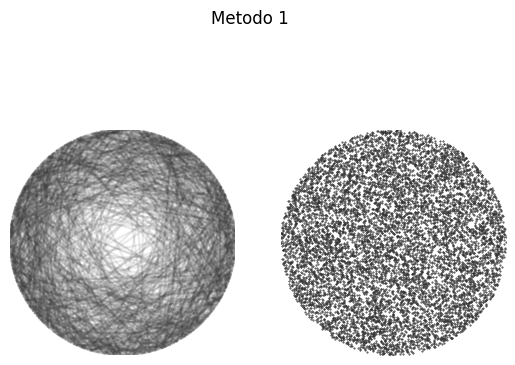

Bertrand, method 2 probability: 0.5


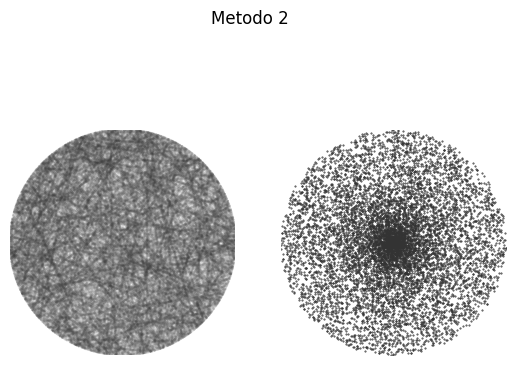

Bertrand, method 3 probability: 0.3334


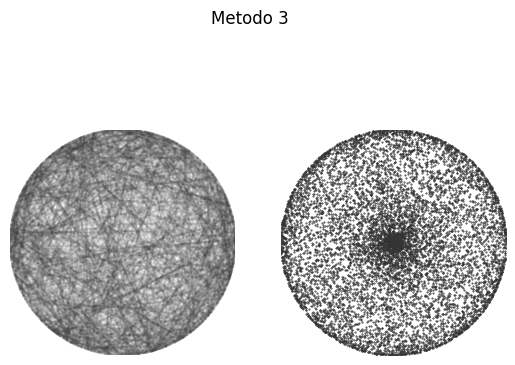

In [ ]:
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

TAU = 2 * np.pi

#Escala de grises
GREY = (0.2,0.2,0.2)
NCHORDS_TO_PLOT = 1000
# Haga las estadísticas utilizando un tamaño de muestra de acordes.
nchords = 10000
#El radio del círculo.
r = 1
#Logitud del lado del cirulo
tlen = r * np.sqrt(3)


#configuración de los ejes
def setup_axes():
    """Configure los dos Ejes con el círculo y los límites correctos, aspecto."""

    fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={'aspect': 'equal'})
    for ax in axes:
        circle = Circle((0,0), r, facecolor='none')   #Ciruclo centrado en 0 y radio r=1
        ax.add_artist(circle)
        ax.set_xlim((-r,r))
        ax.set_ylim((-r,r))
        ax.axis('off')
    return fig, axes


#bertran método 3
def bertrand3():
    """Genere acordes y puntos medios aleatorios usando el "Método 3".

    Se seleccionan pares de puntos aleatorios (distribuidos uniformemente) en el círculo unitario y se unen como cuerdas.

    """

    angles = np.random.random((nchords,2)) * TAU     #Selección alatoria de los ángulos
    chords = np.array((r * np.cos(angles), r * np.sin(angles)))   #Selección de las coordenadas cartesianas de los puntos
    chords = np.swapaxes(chords, 0, 1)
    midpoints = np.mean(chords, axis=2).T           #Calculo del punto medio de la cuerda
    return chords, midpoints

def get_chords_from_midpoints(midpoints):
    """Devuelve los acordes con los puntos medios proporcionados.

     Los métodos 2 y 1 comparten este código para recuperar los puntos finales de la cuerda de
     los puntos medios..

    """


    chords = np.zeros((nchords, 2, 2))
    for i, (x0, y0) in enumerate(midpoints.T):
        m = -x0/y0
        c = y0 + x0**2/y0
        A, B, C = m**2 + 1, 2*m*c, c**2 - r**2
        d = np.sqrt(B**2 - 4*A*C)
        x = np.array( ((-B + d), (-B - d))) / 2 / A
        y = m*x + c
        chords[i] = (x, y)
    return chords


    #bertran método 2

def bertrand2():
    """Genere acordes y puntos medios aleatorios usando el "Método 2".

     Primero seleccione un radio aleatorio del círculo y luego elija un punto
     al azar (distribuido uniformemente) en este radio para ser el punto medio de
     el acorde elegido.

    """

    angles = np.random.random(nchords) * TAU
    radii = np.random.random(nchords) * r
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))   #los puntos seleccionados seran los pntos medios
    chords = get_chords_from_midpoints(midpoints)                            #obtenga las cuerdas con los puntos medios obtendios anteriormente
    return chords, midpoints

def bertrand1():
    """Genere acordes y puntos medios aleatorios utilizando el "Método 1".

     Seleccione un punto al azar (distribuido uniformemente) dentro del círculo y
     considere este punto como el punto medio del acorde elegido.

    """

    # Para asegurarnos de que los puntos estén distribuidos uniformemente dentro del círculo,
     # es necesario ponderar la distancia radial por la raíz cuadrada del azar
     # número elegido en (0,1): debería haber una mayor probabilidad de puntos
     # más alejados del centro, donde hay más sitio para ellos.

    angles = np.random.random(nchords) * TAU
    radii = np.sqrt(np.random.random(nchords)) * r
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = get_chords_from_midpoints(midpoints)
    return chords, midpoints

bertrand_methods = {1: bertrand1, 2: bertrand2, 3: bertrand3}

#Gráfica de los puntos.

def plot_bertrand(method_number):

    # Trazar las cuerdas y sus puntos medios en ejes separados para el seleccionado
     # método para escoger un acorde al azar.

    chords, midpoints = bertrand_methods[method_number]()

    # Aquí es donde realizaremos un seguimiento de qué acordes son más largos que tlen
    success = [False] * nchords

    fig, axes = setup_axes()
    for i, chord in enumerate(chords):
        x, y = chord
        if np.hypot(x[0]-x[1], y[0]-y[1]) > tlen:
            success[i] = True
        if i < NCHORDS_TO_PLOT:
            line = Line2D(*chord, color=GREY, alpha=0.1)
            axes[0].add_line(line)
    axes[1].scatter(*midpoints, s=0.2, color=GREY)
    fig.suptitle('Metodo {}'.format(method_number))

    prob = np.sum(success)/nchords                                       #Análisis de frecuencias N° de cuerdas con longitud mayor a sqrt(3) sobre N° total de cuerdas



    print('Bertrand, method {} probability: {}'.format(method_number, prob))
    plt.savefig('bertrand{}.png'.format(method_number))
    plt.show()

plot_bertrand(1)
plot_bertrand(2)
plot_bertrand(3)

**c)**  Ahora demos la distribución de probabilidad para cada caso.

**i)** Para el primer item note que  por cada punto en el circulo unidad $x^2+y^2< 1$  podemos obtener una cuerda cuyo punto medio sea exactamente el punto escogido, (basta ver que podemos trazar un radio que pasa por ese punto, y trazar la prepednicular al radio que cruza por ese punto), de esta manera como cualquier punto es igualmente probable de escoger en el ciruculo, tenemos que la distribución de probabilidad de este algoritmo sería $$f_1(x,y)=\frac{1}{\text{Área}}= \frac {1}{\pi \cdot 1^2}=\frac{1}{\pi}$$

para $x^2+y^2< 1$ y 0 en otro caso




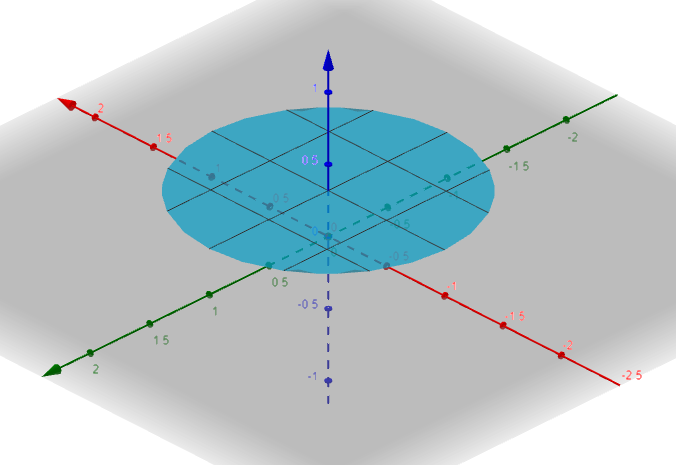

Ahora note además que para que una cuerda tenga longitud mayor a $\sqrt{3}$, esta debe tener su punto medio en el interior del circulo de radio $1/2$ inscrito en el triangulo circunscrito en nuestro circulo como se ve en la siguiente

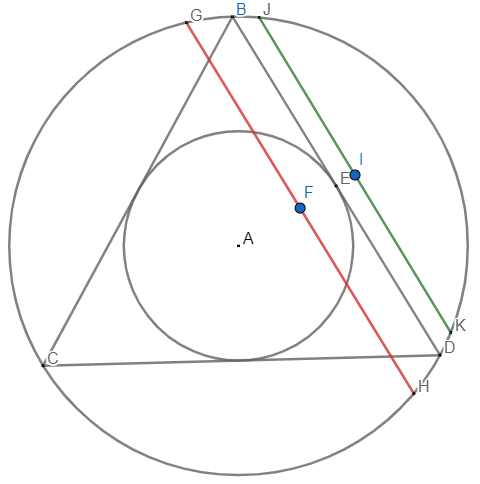



                                      



luego la probabilidad de tener una longitud de cuerda mayor a $\sqrt{3}$, es la misma probabilidad de  escoger un punto en el interior del circulo de radio $1/2$, la cuál  es el área de este circulo sobre el área del circulo de radio $1$, es decir:

$$P(l>\sqrt{3})=\frac{\pi (1/2)^2}{\pi}=\frac{1}{4}$$

Que también la podriamos obtener de la distribución $f$ integrando como se muestra a continuación:

$$P(l>\sqrt{3})=\int_{-1/2}^{1/2} \int_{-\sqrt{1/4- x^2}}^{\sqrt{1/4- x^2}} \frac{1}{\pi} dy dx=\int_{-1/2}^{1/2} \frac{2}{\pi}\sqrt{1/4 -x^2}dx= \frac{2}{\pi}\frac{\pi}{8}=\frac{1}{4}$$

**ii)** Ahora para determinar la distribución de probablidad del segundo  algoritmo note que todo punto en el circulo unidad esta detedrminado por el radio que lo contiene y su distancia al origen, el ángulo que forma el  radio con el eje $x$  lo podemos escoger de manera uniforme en el el intervalo $[0,2\pi]$, y la distancia al centro también la podemos escoger de manera uniforme en el intervalo [0,1], tenemos entonces que la distribucion de probabilidad seria $1/A$ donde $A$ es el área del rectangulo en el plano $r,\theta$, de altura 1 y  base $2\pi$, es decir $f_2(r,\theta)=\frac{1}{2\pi}$ para $0\leq r < 1$ y $0\leq \theta < 2\pi$ y $0$ en otro caso




Ahora note que para que $l>\sqrt{3}$, necetimos que $r< 1/2$ (para que este en el circulo de radio 1/2 como se vio en el anterior item), de esta manera la probabilidad de que $l>\sqrt{3}$, sería el área del rectangulo de altura $1/2$ y base $2\pi$ sobre el área del ciruclo de altura 1 y  base $2\pi$, es decir:


$$P(l>\sqrt{3})=\frac{1/2 \cdot2\pi}{1\cdot 2\pi}=\frac{1}{2}$$

O también lo podriamos calcular de la distribución de probabilidad como:
$$P(l>\sqrt{3})= \int_{0}^{1/2} \int_{0}^{2\pi}\frac{1}{2\pi}d\theta dr \int_{0}^{1/2}dr=\frac{1}{2}$$

**iii)** Ahora para determinar la distribución de probabilidad del último algoritmo, note que se puede escoger tanto  $\alpha$ como $\beta$ por separado  de manera uniforme en el intervalo $[0,2\pi]$, luego la distribución de probabilidad de este algoritmo es

$$f_3(\alpha, \beta)=\frac{1}{Área}=\frac{1}{2\pi \cdot 2\pi}=\frac{1}{4\pi^2}$$


Ahora para que $l>\sqrt{3}$, note que los puntos $A$ y $B$ deben estar separados por un ángulo interior mayor  a $120$  y menor a $240$, pues en este caso  el segmento $\overline{AB}$ esta por debajo del alguno de los lados del triangulo, y por tanto su punto medio esta dentro del circulo concentrico de radio $1/2$ que como ya vimos en el primer item si una cuerda tiene su punto medio allí esta tiene una longitud mayor a $\sqrt{3}$

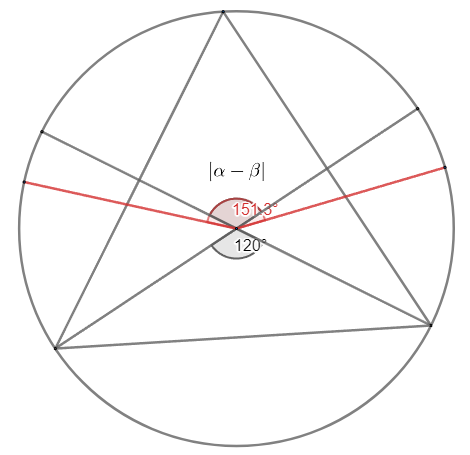

Así la probabilidad de que  $l>\sqrt{3}$ seria el área de la región sombreada que se muestra acontinuación sobre el área del rectangulo en el plano $\alpha,\beta$ de lado $2\pi$ (esta región sombreada corresponde a los puntos $\alpha,\beta$ tales que $2\pi/3<|\alpha-\beta| < 4\pi/3$)






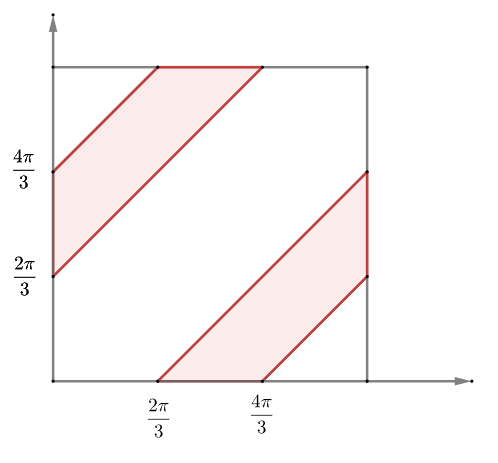



luego


$$P(l>\sqrt{3})=\frac{2\cdot \frac{1}{2}((\frac{4\pi}{3})^2)-(\frac{2\pi}{3})^2)}{4\pi^2}=\frac{4\pi^2/3}{4\pi^2}=\frac{1}{3}$$

Que también la podemos obtener integrando de la siguiente manera



$$P(l>\sqrt{3})= 2\int_{0}^{2\pi /3} \int_{x+2\pi/3}^{x+4\pi/3} \frac{1}{4\pi^2} dy dx+ 2\int_{2\pi/3}^{4\pi/3}\int_{x+2\pi/3}^{2\pi} \frac{1}{4\pi^2} dy dx$$
$$P(l>\sqrt{3})=2\frac{2\pi}{3}\frac{2\pi}{3}\frac{1}{4\pi^2}+2\frac{1}{2}\frac{2\pi}{3}\frac{2\pi}{3}\frac{1}{4\pi^2}=\frac{2}{9}+\frac{1}{9}=\frac{1}{3}$$






## Punto 2

Se gestionan tres garajes para automóviles ubicados en las ciudades A, B y C, que ofrecen servicios de mantenimiento de vehículos y alquiler de automóviles. Los clientes tienen la opción de devolver los autos de alquiler en cualquiera de estos garajes. Sin embargo, debido al aumento reciente en la demanda y la limitación en la oferta de automóviles disponibles para este negocio, se ha tomado la decisión de adquirir más automóviles, con un límite máximo de cien unidades en total.\
La limitación principal radica en que los garajes actuales no cuentan con capacidad suficiente para almacenar tal cantidad de vehículos. Por lo tanto, es necesario construir espacio de almacenamiento adicional. Para determinar la cantidad de espacio requerido en cada ciudad y su ubicación, se ha realizado un análisis de los datos relacionados con los automóviles alquilados y devueltos. Los resultados muestran que:


*   Un automóvil alquilado en la ciudad A tiene una probabilidad del 80% de ser devuelto en esa misma ciudad, y una probabilidad del 10% de ser devuelto en las ciudades B o C.
*   Si el automóvil se alquiló en la ciudad B, existe un 20% de probabilidad de que se devuelva allí, un 30% de probabilidad de ser devuelto en la ciudad A y un 50% de probabilidad de ser devuelto en la ciudad C.
*   En el caso de un automóvil alquilado en la ciudad C, la probabilidad de devolverlo en la misma ciudad es del 20%, mientras que es del 20% para la ciudad A y del 60% para la ciudad B.



¿ Cuál es la cantidad de espacio de almacenamiento necesario en cada una de las ciudades?.

**Solución:** Esta situación se puede modelar por medio de una cadena de Markov, como se muestra en la siguiente imagen.
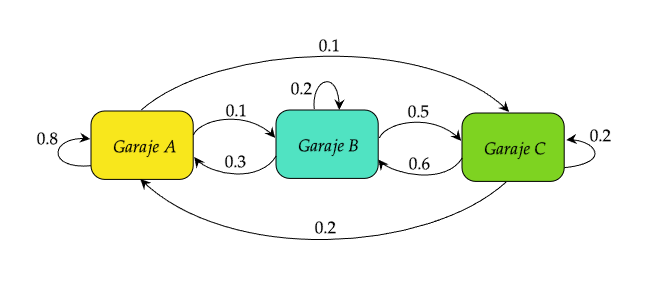

Las flechas de la cadena representan la proporción de carros por cada garaje que son devueltos en cada uno de ellos, siguiendo las indicaciones dadas. Si representamos por $x^j_i$ a la cantidad de carros en el garaje $j$ en el día $i$, donde $j=A,B,C$, entonces el sistema se puede representar para $k\in \mathbb{N}$ como
$$\mathbf{x_{k+1}}=\mathbf{x_k \cdot P}$$
$$(x_{k+1}^A,x_{k+1}^B,x_{k+1}^C)=(x_{k}^A,x_{k}^B,x_{k}^C)\cdot \begin{pmatrix}0.8 & 0.1 & 0.1\\ 0.3 &0.2 & 0.5 \\ 0.2 & 0.6 & 0.2\end{pmatrix}.$$
Transponiendo a ambos lados de la ecuación, obtenemos que
$$\mathbf{x_{k+1}^T}=\mathbf{P^T\cdot x_k^T}$$
$$\begin{pmatrix}x_{k+1}^A \\x_{k+1}^B\\x_{k+1}^C\end{pmatrix}=\begin{pmatrix} 0.8 & 0.3 & 0.2\\ 0.1 &0.2 &0.6 \\ 0.1 & 0.5 &0.2\end{pmatrix} \begin{pmatrix}x_{k}^A \\x_{k}^B\\x_{k}^C\end{pmatrix}.$$
Por lo tanto, concluimos que
$$\mathbf{x^T_{k}}=\mathbf{(P^T)^{k}\cdot x_0},$$
y nuestro problema se reduce a hallar, si existe, el vector límite de esta sucesión de vectores que sea, idealmente, independiente de la cantidad inicial de carros $\mathbf{x_0}$ que hay en los tres garajes. Este vector $\mathbf{x}$ debe satisfacer que
$$\mathbf{x}=\mathbf{P^T\cdot x}.$$
Es decir, debe ser autovector de $P^T$ con autovalor respectivo $\lambda=1$. Hallemos con ayuda de Python este vector, calculando primero el espacio asociado a dicho autovalor.

In [ ]:
A=np.array([[0.8,0.3,0.2],[0.1,0.2,0.6],[0.1,0.5,0.2]])
LA.eig(A)

(array([ 1.       ,  0.5472136, -0.3472136]),
 array([[ 0.87179487,  0.81607429,  0.07844683],
        [ 0.35897436, -0.43077627, -0.74305903],
        [ 0.33333333, -0.38529801,  0.6646122 ]]))

Así, el espacio correspondiente al autovalor $\lambda=1$ es de la forma $$\alpha \begin{pmatrix}0.87179487 \\0.35897436\\  0.33333333\end{pmatrix}, \alpha \in \mathbb{R}.$$
Teniendo en cuenta que la suma de las componentes de nuestr vector límite debe ser 100 (la cnatidad total de carros), obtenemos

In [ ]:
a=np.array([ 0.87179487,  0.35897436,  0.33333333])
100*a/LA.norm(a,ord=1)

array([55.73770495, 22.9508198 , 21.31147525])

Concluimos entonces que $\textbf{x}=(55.73770495, 22.9508198 , 21.31147525)^T$.

Es decir, a largo plazo, $55.74$ será la cantidad esperada de autos en el garaje $A$; $22.95$, en el garaje $B$ y $21.31$, en el garaje $C$. Por lo tanto, es recomendable construir al menos $56$ espacios en  $A$, $23$ espacios en $B$, y $22$ espacios en $C$. Aunque esto no garantiza que en algún momento se vayan a quedar sin espacio para algún auto, si se mantienen las probabilidades descritas al inicio esta cantidad de estacionamientos será suficiente a largo plazo.

## Punto 3

Cierta loteria tiene un juego een el que se paga $1000$ para comprar un boleto con un número de tres digitos de su elección. Si en el sorteo al final del dia, el número es ganador se gana $500000$ pesos

**a)** Suponga que compra un billete por semana durante un año. ¿Qué posibilidad tiene de resultar ganador?

**b)** ¿Puede mejorar sus posibilidades de resultar gandor este año comprando mas de un boleto por semana? calcule la probabilidad de salir ganador si se compran $n$ boletos a la semana, para $n=1,2,3,\dots 9$

**c)** Suponga que la loteria vende $1000000$ de billetes a la semana ¿Cúal es el rango de variación probable en la cantidad de dinero que la empresa de lotería ganará esta semana?¿Qué probabilidades hay que la loteria pierda dinero esta semana ? Use el teorema central del limite

$\underline{{Solución}}$

**a)** Note que la probabilidad de ganar un boleto es de uno  entre el total de de boletas, es decir $p=\frac{1}{1000}$, luego utilizando la distribución binomial vemos que la probabilidad de ganar $k$ boletos de loteria, comprando 1 billete de loteria semanal durante un año es:

$$f(k)=P(X=k)=\binom{52}{k}p^k(1-p)^{52-k}$$

por lo tanto la probabilidad de resultar perdedor en todas las loterias es

$$f(0)=(1-p)^{52}$$

Y por tanto la probabilidad de ganar almenos 1 sería:

$$1-f(0)=1-(1-p)^{52}≈ 0.05069583185373461≈5.09 \%
 $$

In [ ]:
1-(1-(1/1000))**52

0.05069583185373461

**b)**

Antes de responder la pregunta de ¿cuál es la estrategia que da la mejor probabilidad de ganar?, miraramos, *¿Cuántas estrategias posibles hay?*


Sea $n$ el números de boleto que compra la persona en una semana, note que por ejemplo si compra 2 boletos entonces esto lo puede hacer o comprandolos ambos el lunes, o comprandolos uno el lunes y el otro el miercoles o... etc, el total de forma en las que lo puede hacer, es


$$\binom{2+(7-1)}{2}=28$$

Que corresponde al número de soluciones enteras no negativas de la ecuación $x_1+x_2+x_3+\cdots +x_7=2$ estas son llamadas las combinaciones de 2 en 7 partes, note que cada una de estas combinaciones asigna una probabilidad, (contaremos la probablidad de que pierda las $n$ boletas), por ejemplo si compro una boleta el lunes y otra el martes la probabilidad que se le asigna a esta combinacion es

$$\frac{999}{1000}\frac{999}{1000}$$

En cambio si compra las dos el miercoles, la probabilidad que se le asigna es

$$\frac{998}{1000}$$


Para el fin que queremos no nos importa que para dos combinaciones distintas tengamos la misma probabibilidad, pues al fin y alcabo si dos combinaciones tiene la misma probabilidad ambas son igual de buenas.


Analogo a como se dedujo para $n=2$, el número de  combinaciones (estrategias) semanales que puede hacer una persona si compra $n$ boletas es


$$r_n=\binom{n+(7-1)}{n}=\binom{n+6}{n}$$


Además una persona cada semana podria cambiar de estrategia, por lo que habrian

$$r_n^{52}$$

estrategias en todo el año, solo para $n=2$, esta cantidad supera las 75 cifras, como se ve acontianuación:


In [ ]:
$28**52

1787383027988360473982812052191328276130059755787807872687032756955267465216

Respondamos ahora la pregunta: *¿Cual es la mejor estrategia?*

Ahora dentro de todas estas estrategias la mejor resulta ser comprar los $n$ boletas todas las semanas en un mismo dia. Es decir  tenemos que dados $n$, y  $l_i$ la cantidad de boletos comprados en el dia $i$.



$$\frac{1000-n}{1000}\leq ∏_{i=1}^7 (\frac{1000-l_i}{1000})\hspace{2cm}(1)$$



con $l_1+l_2+\cdots +l_7=n$. Esto es, la probabilidad de perder todas las boletas en una semana (con cualquier estrategia), debe ser mas alta que si se compran todas en un mismo dia, luego si esto se cumple, basta comprar todas las semanas las $n$ boletas en un dia, y se reduciria la probabilidad de perder. La cual sería


$$1-\left(\frac{1000-n}{1000}\right)^{52}$$


In [ ]:
for n in range(1,10):

 prob=1-((1000-n)/1000)**52

 print("La Probabilidad de ganar si se compran ",n," boletos todas las semanas es: ", prob)

La Probabilidad de ganar si se compran  1  boletos todas las semanas es:  0.05069583185373461
La Probabilidad de ganar si se compran  2  boletos todas las semanas es:  0.0988685502807084
La Probabilidad de ganar si se compran  3  boletos todas las semanas es:  0.14464138826863993
La Probabilidad de ganar si se compran  4  boletos todas las semanas es:  0.18813167449009827
La Probabilidad de ganar si se compran  5  boletos todas las semanas es:  0.22945111068811785
La Probabilidad de ganar si se compran  6  boletos todas las semanas es:  0.26870603628913203
La Probabilidad de ganar si se compran  7  boletos todas las semanas es:  0.3059976808194178
La Probabilidad de ganar si se compran  8  boletos todas las semanas es:  0.34142240467579144
La Probabilidad de ganar si se compran  9  boletos todas las semanas es:  0.3750719287769433


**Con lo anterior vemos que Sí se mejora la probabilidad de ganar si se compran mas boletos por semana**

Veamos númericamente que en efecto la desigualdad $(1)$ se tiene

In [ ]:
#Código que cálcula las combinaciones de n en d partes

def combinacioness(n, d, depth=0):
    if d == depth:
        return [[]]
    return [
        item + [i]
        for i in range(n+1)
        for item in combinacioness(n-i, d, depth=depth+1)
        ]

In [ ]:
#Código que calcula la mejor estrategia

def probperder(n):
 d=7
 lst = [[n-sum(p)] + p for p in combinacioness(n, d-1)]
 arr=np.array(lst)
 argminn=arr[0]
 l=1


 for i in range(np.shape(arr)[0]):

       m=(1-(arr[i][0])/1000)*(1-(arr[i][1])/1000)*(1-(arr[i][2])/1000)*(1-(arr[i][3])/1000)*(1-(arr[i][4])/1000)*(1-(arr[i][5])/1000)*(1-(arr[i][6])/1000)

 if m<l:

   argminn=arr[i]   #se ve sobre todas las combinaciones de n cual es la que reduce la probabilidad
   l=m

   return l,argminn

In [ ]:
for n in range(1,10):
 print( "La probabilidad de perder con la mejor estrategia comprando ",n," boletos es:",probperder(n)[0],"y esta estrategia es: ",probperder(n)[1])

La probabilidad de perder con la mejor estrategia comprando  1  boletos es: 0.999 y esta estrategia es:  [0 0 0 0 0 0 1]
La probabilidad de perder con la mejor estrategia comprando  2  boletos es: 0.998 y esta estrategia es:  [0 0 0 0 0 0 2]
La probabilidad de perder con la mejor estrategia comprando  3  boletos es: 0.997 y esta estrategia es:  [0 0 0 0 0 0 3]
La probabilidad de perder con la mejor estrategia comprando  4  boletos es: 0.996 y esta estrategia es:  [0 0 0 0 0 0 4]
La probabilidad de perder con la mejor estrategia comprando  5  boletos es: 0.995 y esta estrategia es:  [0 0 0 0 0 0 5]
La probabilidad de perder con la mejor estrategia comprando  6  boletos es: 0.994 y esta estrategia es:  [0 0 0 0 0 0 6]
La probabilidad de perder con la mejor estrategia comprando  7  boletos es: 0.993 y esta estrategia es:  [0 0 0 0 0 0 7]
La probabilidad de perder con la mejor estrategia comprando  8  boletos es: 0.992 y esta estrategia es:  [0 0 0 0 0 0 8]
La probabilidad de perder con la

Ahora esta desigualdad también podemos ver que es cierta mediante el siguiente argumento:


 $$∏_{i=1}^7 (\frac{1000-l_i}{1000})=∏_{i=1}^7 (1-\frac{l_i}{1000})$$

 Cuando se expande el anterior producto, note que se puede agrupar por la cantidad de factores que toman algún $l_i$, por ejemplo solo hay $7$ terminos en la expanción que son de la forma $l_i/1000$, solo hay $\binom{7}{2}$ terminos que son de la forma  $l_il_j/1000$,etc, quedandonos que lo anterior es igual a:


 $$1-\sum_{J_1} \frac{l_{J_1}}{1000}+\sum_{J_2} \frac{l_{J_2}}{1000^2}-...+\sum_{J_6} \frac{l_{J_6}}{1000^6}-\sum_{J_7} \frac{l_{J_7}}{1000^7}$$


 Donde $J_i$ es un subconjunto de tamaño $i$ de $\{1,2,3,4,5,6,7\}$ y $l_{J_i}=l_{k_1}l_{k_2}\cdots l_{k_i}$ ( $J_i=\{k_1,\dots ,k_i \}$).

 Note que lo anterior lo podemos agrupar de la siguiente manera:


$$(1-\sum_{J_1} \frac{l_{J_1}}{1000})+\frac{1}{1000^2}(\sum_{J_2} l_{J_2}-\sum_{J_2} \frac{l_{J_3}}{1000})+...+\frac{1}{1000^6}(\sum_{J_6} l_{J_6}-\sum_{J_2} \frac{l_{J_7}}{1000})$$

Note que de la forma en la que se agrupo obtenemos que cada parantesis tiene  un numero mayor a 0 (el factor 1/1000 en $l_{J_{i+1}}$ hace que estos sumandos esten acotados por la suma de los $l_{J_{i}}$, pues $l_k$ es menor a 1000 para todo $k$). De esta manera

$$(1-\sum_{J_1} \frac{l_{J_1}}{1000})+\frac{1}{1000^2}(\sum_{J_2} l_{J_2}-\sum_{J_2} \frac{l_{J_3}}{1000})+...+\frac{1}{1000^6}(\sum_{J_6} l_{J_6}-\sum_{J_2} \frac{l_{J_7}}{1000})$$
$$\geq 1-\sum_{J_1} \frac{l_{J_1}}{1000}=1-\frac{n}{1000}$$

**c)** Sea $X_i$ la variable aleatoria que es 1 si el boleto  $i$-ésimo gana y 0 si no gana, es claro que $X_i$ se distribuye bernoulli con función de distribución de probabilidad

$$f_i(x)=p^x(1-p)^{1-x}$$

con $x=0$ o $1$, note entonces que que si sumamos dos de estas varibles $X_i+X_j$, entonces esta nueva variable aleatoria, se distribuye de manera binomial, pues para que hallan $k$ exitos ($k=0,1,2$) se debe escoger las varibles que me van a tomar un $x$ exitoso lo cual se hace de $\binom{2}{k}$ formas, y multiplicar por las respectivas probabilidades de exito y falla $p^k(1-p)^{2-k}$, analogamente vemos que si tenemos $n$ de estas variables aleatorias de tipo bernoulli y las sumamamos estas se van a comportar como una binomial con parametro $n$ y probablidad $p$.


Además notemos que por el teorema central del limite, la vairable aleatoria $X_1+X_2+\dots +X_n$ a medida que $n$ crece se comporta como una distribución normal con media $n\mu$ y variaza $\sigma \sqrt{n}$ donde $\mu$ es la media y $\sigma$ la Desviacion estandar  de cada una de las variables i.i.d $X_i$.


Con lo anterior vemos que $Y=X_1+X_2+\dots+ X_{1000000}$ (que es la variable aleatoria que nos dira cuantos boletos se ganaron), cumple que $Y∼Bin(1000000,\frac{1}{1000})$, pero por el teorema central del limite también tenemos que al ser $n=1000000$ un número bastante grande  $Y$  tendera a distribuirse como una normal con media $\mu_y=\mu n=1000$, y desviacion estandar $\sigma_y=\sigma \sqrt{n}=\sqrt{1000(1-\frac{1}{1000})}=\sqrt{999}$. Ahora el rango de variacion probable de esta variable aleatoria, sería el intervalo de radio $\sigma_y$ centro en $\mu_y$, es decir $[1000-\sqrt{999},1000+\sqrt{999}]$ como $\sqrt{999}≈ 32$, obtenemos que la cantida probable  de boletos que se ganaran esta en el intervalo $[968, 1032]$. Si se ganan $968$ boletos, entonces las ganacias de la empresa serían:

$$10^610^3-5\cdot 10^5\cdot 968=516\cdot 10^6$$

y si se ganan $1032$ boletos entonces las ganacias de la empresa serían:

$$10^610^3-5\cdot 10^5\cdot 1032=484\cdot 10^6$$

Por tanto el rango de variación probable en las ganancia de la empresa sería

$$[484\cdot 10^6 ,516\cdot 10^6]$$

y la probabilidad de que $Y$ este en el intervalo $[968,1032]$ es la misma probabilidad de que  en una normal estandarizada la vairable aletaoria se encuentre entre $[-1,1]$ (haciendo el cambio de variable $Z=\frac{Y-\mu_y}{\sigma_y}$), y esta probabilidad es:

$$P(968 \leq Y \leq 1032)= 0.6826894921370859\approx 68.26 \%$$



In [ ]:
norm.cdf(1,0,1)-norm.cdf(-1,0,1)

0.6826894921370859

Ahora para que la empresa pierda esta semana debemos tener que

$$10^610^3-5\cdot 10^5\cdot y < 0$$

De donde  $y>2000$, es decir,  se deben ganar mas de 2000 boletos, ahora la probabilidad de que esto pase es:


$$P(2000 < Y)\approx 0$$

esta probabilidad es menor a $10^{-16}$ por tanto es practicamente imposible que la empresa pierdad dinero

In [ ]:
1-norm.cdf(2000,1000,32)

0.0

## Punto 4

Una calle de sentido único tiene un desvío, y los autos que llegan al desvío pueden doblar a la derecha o a la izquierda. Un automóvil que llega al desvío doblará a la derecha con una probabilidad del $0.6$ y doblará a la izquierda con una probabilidad del $0.4$. Los autos llegan al desvío con una tasa de 8 autos por minuto.


Sea $λ=8$ el flujo promedio de autos que llegan al desvío por minuto y $p=0.6$ la probabilidad de que un auto gire a la derecha en el desvío.



In [ ]:
lamb = 8
p = 0.6

Consideremos las siguiente definición:
* **Distribución Poisson.** Una variable aleatoria $X$ tiene distribución Poisson si cuenta el número de sucesos que se dan en un determinado lapso de tiempo $t$, sabiendo que la tasa promedio de llegada es $λ$ en el tiempo $t$. La función de probabilidad de la distribución Poisson es
$$f_{X}(x)= \frac{e^{-λ t}(λt)^{x}}{x!} I_{ℕ}(x)$$
donde $I_{ℕ}$ es la función indicatriz.

Sean $X_{t}:$ "Número de autos que llegan al desvío en $t$ minutos" y $Y_{t}:$ "Número de autos que giran a la derecha en el desvío en $t$ minutos" dos variables aleatorias. Por la naturaleza de la situación se tiene que $X_{t}$ tiene distribución Poisson y $Y_{t}$ tiene distribución binomial.

Antes de intentar resolver el problema tomamos en consideración dos posibles casos:
1. $X_{t}$ y $Y_{t}$ son variables aleatorias independientes. Si asumimos independencia entonces $X\sim Poisson(λ=8)$ y $Y\sim Bin(n = λt, p=0.6)$ (si $λt$ no es un número entero se redondea el valor al número natural más cercano). La función de probabilidad conjunta es:
$$
f_{XY,t}^{i}(x,y)=\frac{e^{-λ t}(λt)^{x}}{x!}\binom{λ t}{y}p^{y}(1-p)^{λt-y} I_{ℕ\times ℕ}(x,y)
$$
                
2. $X_{t}$ y $Y_{t}$ no son variables aleatorias independientes. En este caso se mantiene que $X\sim Poisson(λ=8)$, no obstante, $Y∼Bin(n=x_{t},p=0.6)$ en donde $x_{t}$ representa una realización de la variable aleatoria $X_{t}$. La función de probabilidad conjunta es:
\begin{equation*}
f_{XY,t}^{ni}(x,y)=\frac{e^{-λ t}(λt)^{x}}{x!}\binom{x}{y}p^{y}(1-p)^{x-y} I_{\{(i,j)| i\geq j, i,j \in ℕ\}}(x,y)
\end{equation*}

In [ ]:
#Funciones de probabilidad para una variable binomial y una variable Poisson
def fpBin(z,n,p):
  return(math.comb(int(n),int(z))*(p**z)*((1-p)**(n-z)))
def fpPoi(z,l,t):
  return(np.exp(-l*t)*((l*t)**z / np.math.factorial(int(z))))


# Funciones de distribución conjunta
# Caso 1: Independencia
def fpind(x,y,l,p,t=1):
  Poi = fpPoi(x,l,t)
  Bin = fpBin(y,l*t,p)
  return(Poi*Bin)
# Caso 2: No independencia
def fpnoind(x,y,l,p,t):
  Poi = fpPoi(x,l,t)
  Bin = fpBin(y,x,p)
  return(Poi*Bin)

Suponer que no se tiene independencia entre las variables aleatorias surge a causa del problema de calcular, por ejemplo, la probabilidad de que giren cuatro autos a la derecha en un minuto, sabiendo que en ese mismo minuto solo llegaron tres carros a la intersección: en el caso de independencia esta probabilidad es diferente de cero y en el caso de no independiencia la probabilidad es exactamente cero que parece tener más sentido (en el caso en que no hay independencia, el espacio muestral de la variable $Y_{t}$ depende del resultado de $X_{t}$).

In [ ]:
#Probabilidad de que giren cuatro autos a la derecha dado que llegaron tres autos al desvío
print("La probabilidad si sí hay independencia es",fpind(3,4,lamb,p,1))
print("La probabilidad si no hay independencia es",fpnoind(3,4,lamb,p,1))

La probabilidad si sí hay independencia es 0.006648227343743031
La probabilidad si no hay independencia es 0.0


### ¿Cuál es la probabilidad de que al menos cuatro autos doblen a la derecha en el desvío en tres minutos?

La probabilidad de que al menos cuatro autos doblen a la derecha en tres minutos puede ser calculada como:
\begin{equation*}
Pr(Y_{3}\geq 4) = 1 - Pr(Y_{3}<4) = 1 - Pr(Y_{3}\leq 3)
\end{equation*}

**Caso 1.** Si las variables aleatorias son independientes entonces
\begin{equation*}
Pr(Y_{3}\leq 3) =\sum_{y=0}^{3}\sum_{x\in ℕ}f_{XY,3}^{i}(x,y)  ≈ 2.107 \times 10^{-6}
\end{equation*}
luego,
\begin{equation*}
Pr(Y_{3}\geq 4)  ≈ 0.9999978
\end{equation*}

In [ ]:
t0 = 3
print(sum([fpBin(y,lamb*t0,p) for y in range(3+1)]))
print(1-sum([fpBin(y,lamb*t0,p) for y in range(3+1)]))

2.107966100586105e-06
0.9999978920338994


**Caso 2.** Si las variables aleatorias no son independientes entonces
\begin{equation*}
Pr(Y_{3}\leq 3) =\sum_{y=0}^{3}\sum_{x\in ℕ ,y\leq x}f_{XY,3}^{ni}(x,y) = \sum_{y=0}^{3}\sum_{x\in ℕ ,y\leq x} \frac{e^{-λ t}(λt)^{x}}{x!}\binom{x}{y}p^{y}(1-p)^{x-y}
\end{equation*}
\begin{equation*}
Pr(Y_{3}\leq 3)  ≈ 0.000343
\end{equation*}
luego,
\begin{equation*}
Pr(Y_{3}\geq 4)  ≈ 0.999656
\end{equation*}

In [ ]:
t0 = 3
print(sum(np.array([sum([fpnoind(x,y,lamb,p,t0) for x in range(0,1000)]) for y in range(0,3+1)])))
print(1-sum(np.array([sum([fpnoind(x,y,lamb,p,t0) for x in range(0,1000)]) for y in range(0,3+1)])))

0.00034376716590472375
0.9996562328340953


### Dado que tres autos doblan a la derecha en el desvío en 3 minutos, ¿cuál es la probabilidad de que dos autos doblen a la izquierda en el desvío en 3 minutos?

Esta probabilidad puede ser calculada como:
\begin{equation*}
Pr(n-Y_{3}=2|Y_{3}= 3) = Pr(Y_{3}=n-2|Y_{3}= 3) = \frac{Pr(Y_3 = n-2 \text{ y } Y_3=3)}{Pr(Y_{3}=3)}
\end{equation*}
en donde $n$ representa la cantidad total de autos que llegan al desvío en tres minutos.

**Caso 1.** Si las variables aleatorias son independientes entonces $n=\lambda t = 24$, por ende,
\begin{equation*}
Pr(24-Y_{3}=2|Y_{3}= 3) =  \frac{Pr(Y_3 = 22 \text{ y } Y_3=3)}{Pr(Y_{3}=3)} = 0
\end{equation*}
dado que la probabilidad de que $Y_{3}$ tome dos valores diferentes al tiempo es cero.

**Caso 2.** Si las variables aleatorias no son independientes entonces $n=X_{3}$ y por lo tanto,
\begin{equation*}
Pr(X_{3}-Y_{3}=2|Y_{3}= 3) =  \frac{Pr(Y_3 = X_{3}-2 \text{ y } Y_3=3)}{Pr(Y_{3}=3)} = \frac{Pr(X_{3}=5)}{Pr(Y_{3}=3)} \approx 0.008328
\end{equation*}

In [ ]:
t1 = 3
print(sum([fpnoind(5,y,lamb,p,t1) for y in range(0,10+1) if y<=4])/sum([fpnoind(x,3,lamb,p,t1) for x in range(0,10000+1) if 3<=x]))

0.008328286658843343


### Dado que llegan 10 autos al desvío en 3 minutos, ¿cuál es la probabilidad de que cuatro de los autos doblen a la derecha en el desvío?

Esta probabilidad puede ser calculada como una probabilidad condicional de la siguiente manera,
\begin{equation*}
Pr(Y_{3}=4|X_{3}= 10) =\frac{Pr(Y_3 = 4 \text{ y } X_3=10)}{Pr(X_{3}=10)}
\end{equation*}

**Caso 1.** Si las variables aleatorias son independientes entonces
\begin{equation*}
Pr(Y_{3}=4|X_{3}= 10) =\frac{Pr(Y_3 = 4 \text{ y } X_3=10)}{Pr(X_{3}=10)} \overbrace{=}^{indepencia}\frac{Pr(Y_3 = 4) \cdot  Pr(X_3=10)}{Pr(X_{3}=10)} = Pr(Y_{3}=4)
\end{equation*}
por tanto,
$$Pr(Y_{3}=4|X_{3}= 10) ≈ 1.5141 \times 10^{-5}$$

In [ ]:
t2 = 3
print(fpBin(4,lamb*t2,p))

1.5141700081545135e-05


**Caso 2.** Si las variables aleatorias no son independientes entonces
\begin{equation*}
Pr(Y_{3}=4|X_{3}= 10) =\frac{Pr(Y_3 = 4 \text{ y } X_3=10)}{Pr(X_{3}=10)} = \frac{f_{XY,3}^{ni}(10,4)}{\sum_{y=0}^{10}f_{XY,3}^{ni}(10,y)}\approx 0.111476
\end{equation*}

In [ ]:
print(fpnoind(10,4,lamb,p,t2)/sum([fpnoind(10,y,lamb,p,t2) for y in range(0,10+1)]))

0.11147673600000002


A continuación vamos a simular la situación por medio de las variables aleatorias para verificar la probabilidad de que cuatro autos doblen a la derecha dado que llegaron diez autos al desvío.

In [ ]:
# Número de simulaciones
m = int(1E7)
#Simulación para el caso en que se supone independencia
Si = np.transpose(np.array([np.random.poisson(lamb*t2,m), np.random.binomial(lamb*t2,p,m)]))
#Simulación para el caso en que no hay independencia
S = np.random.poisson(lamb*t2,m)
Sni = np.array([(s, np.random.binomial(s,p)) for s in S])

In [ ]:
# Espacio muestra cuando X_3=10
A1 = np.array([a for a in Si if a[0]==10])[:,1] #Independencia
A2 = np.array([a for a in Sni if a[0]==10])[:,1] #No independencia

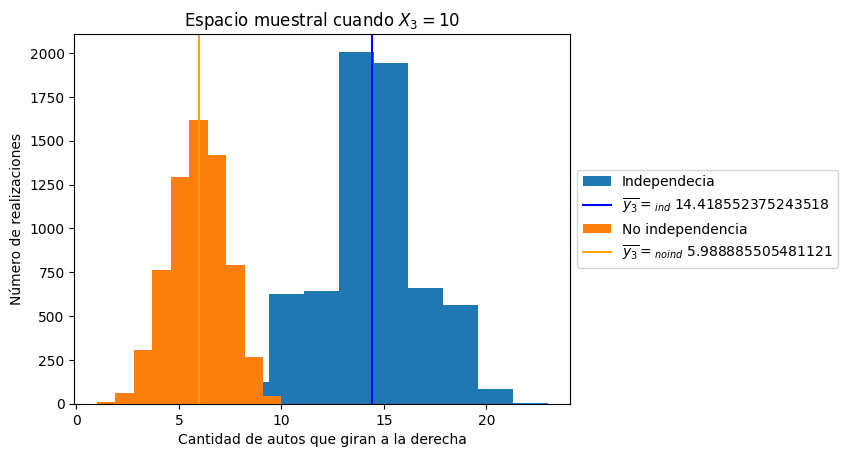

In [ ]:
plt.hist(A1,10,label="Independecia")
plt.axvline(x = np.mean(A1), color = 'blue',label = r"$\overline{y_{3}} =_{ind}$ "+str(np.mean(A1)))
plt.hist(A2,10,label="No independencia")
plt.axvline(x = np.mean(A2), color = 'orange',label = r"$\overline{y_{3}} =_{noind}$ "+str(np.mean(A2)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r"Espacio muestral cuando $X_3 = 10$")
plt.xlabel("Cantidad de autos que giran a la derecha")
plt.ylabel("Número de realizaciones")
plt.show()

In [ ]:
print("Caso 1: La probabilidad de que cuatro autos doblen a la derecha dado que llegaron diez autos al desvío es %5.8f" % (len([a for a in A1 if a==4])/len(A1)) )
print("Caso 2: La probabilidad de que cuatro autos doblen a la derecha dado que llegaron diez autos al desvío es %5.8f" % (len([a for a in A2 if a==4])/len(A2)) )

Caso 1: La probabilidad de que cuatro autos doblen a la derecha dado que llegaron diez autos al desvío es 0.00000000
Caso 2: La probabilidad de que cuatro autos doblen a la derecha dado que llegaron diez autos al desvío es 0.11616931


Notemos que en la anterior gráfica se evidencia el comportamiento del fenómeno en cada caso. Realizando la simulación de cada caso y con la intuición de la gráfica se demuestra la probabilidad que fue hallada antes por métodos analíticos.

### Comparación

En conclusión, se puede evidenciar que cuando se supone que no hay independencia entre las variables aleatorias el resultado es intuitivamente más certero, dado que por ejemplo en respuesta de la tercera pregunta la media del número de autos que giran a la derecha es:
*  $\overline{y_{3}} =24\cdot 0.6 ≈ 14.3 $, cuando hay independencia,
*  $\overline{y_{3}} = 10\cdot 0.6 = 6 $, cuando hay independencia,

y considerar que en promedio giran más autos a la derecha que los autos que se suponen que están al desvío parece ser incierto.


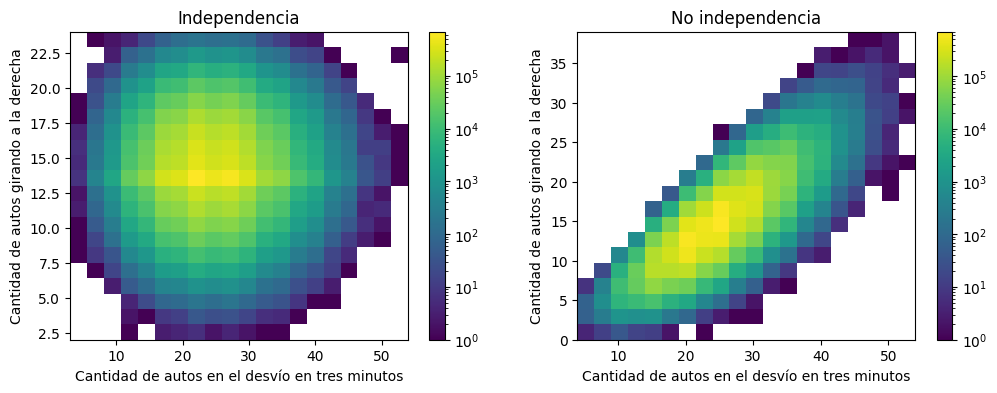

In [ ]:
fig = plt.subplots(1,2,figsize = (12,4))

plt.subplot(121)
plt.hist2d(Si[:,0], Si[:,1], bins=20,norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("Cantidad de autos en el desvío en tres minutos")
plt.ylabel("Cantidad de autos girando a la derecha")
plt.title("Independencia")

plt.subplot(122)
plt.hist2d(Sni[:,0], Sni[:,1], bins=20,norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("Cantidad de autos en el desvío en tres minutos")
plt.ylabel("Cantidad de autos girando a la derecha")
plt.title("No independencia")

plt.show()

Para una cantidad de $10^{7}$ simulaciones, los gráficos anteriores muestran histogramas de las dos variables para cada caso, en donde la cantidad de realizaciones se categoriza por medio de una escala de colores.

La aproximación a la distribución conjunta en cada caso evidencia la gran diferencia de asumir o no independencia en este problema. La gráfica de la derecha exhibe la condición $f_{XY,t}^{ni}(x,y)=0$ si $x,y\in ℕ $ y $x>y$.

## Punto 5

Un grupo de jóvenes ha decidido hacer un picnic al aire libre y ahora están sentados en
el césped en algún lugar, luchando contra las moscas y, bueno, con esta lata de cerveza en
particular. Porque el envase no quiere quedarse en posición vertical en el césped; en cambio,
solo quiere volcarse y derramar su delicioso contenido para que las hormigas lo disfruten. ¿Que
debemos hacer para que el envase no se vaya de lado y no se derrame la cerveza?

**Solución.**
Una primera aproximación para resolver este problema es recordar que la lata se caerá si la proyección de su centro de masa sobre el suelo está fuera de la lata. Por lo tanto, cuando este centro de masa se ubica lo más cercano al suelo, una variación en su ángulo de inclinación desplazará este centro de masa en menor medida que cuando se ubica más abajo, como se muestra en la siguiente figura. Para esta aproximación, asumimos que la geometría del cuerpo no cambia cuando este se inclina (el líquido se queda "quieto" cuando la lata se inclina).\
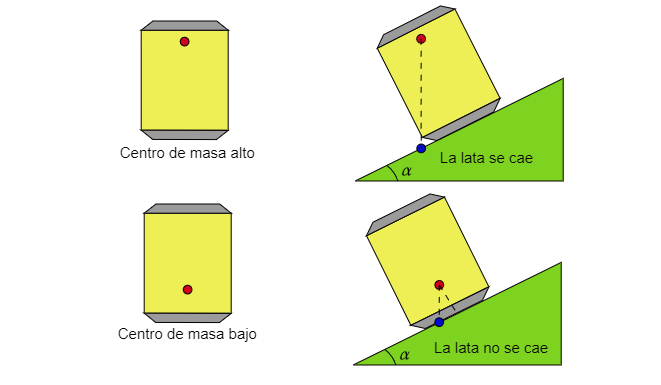

Por lo tanto, podriamos considerar inicialmente un problema de minimización de la altura del centro de masa, en función de la cantidad de líquido que contiene la lata. Para ello, asumimos que la lata es un cilindro con dos tapas con altura $h$, radio $r$ y masa $m$, y la altura de la lata está dada por $x$, donde la desnidad $\delta$ del líquido también está dada.
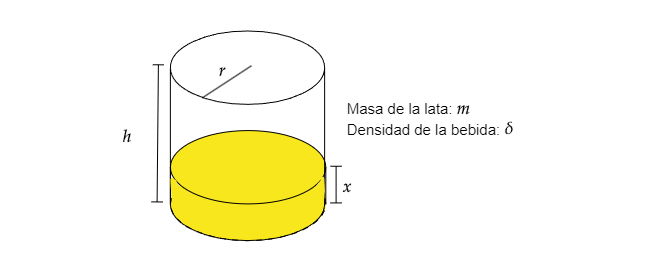

Para hallar la altura del centro de masa, usaremos que el centro de masa de un sistema de varios cuerpos se puede calcular como si cada masa de los cuerpos estuvieran concentrados en su centro de masa. Para este caso, calcularemos primero el centro de masa de la lata, y posteriormente el de la bebida, para depués hallar el centro de masa entre ambos.\
Para la lata, si asumimos densidad uniforme, es claro por simetría que la altura del centro de masa es la altura de la botella dividida entre dos (el centro); es decir $CM_{z,lata}=\frac{h}{2}$.\
De manera similar, para la bebida, el centro de masa está ubicado en la mitad de la altura de la misma; es decir, $CM_{z,bebida}=\frac{x}{2}$. Por otra parte, su masa total se calcula a como
$$m_{gaseosa}=\delta V_{gaseosa}=\delta \pi r^2 x.$$
Entonces, la altura del centro de masa del sistema lata-bebida está dado por
$$CM_{z,total}=\frac{m_{lata}\cdot CM_{z,lata}+m_{bebida}\cdot CM_{s,bebida}}{m_{lata}+m_{bebida}}.$$
Reemplazando los datos obtenidos, obtenemos que
$$CM_{z,total}=\frac{m(\frac{h}{2})+\delta \pi r^2 x (\frac{x}{2})}{m+\delta \pi r^2 x}.$$
Así, nuestro problema se reduce a minimizar
$$f(x)=CM_{z,total}(x)=\frac{mh+\delta \pi r^2x^2}{2(m+\delta \pi r^2 x)}.$$
Para llo, haciendo el numerador de $f'(x)=0$, obtenemos que
$$(2\delta \pi r^2 x)\cdot 2 (m+\delta \pi r^2 x)-(mh+\delta \pi r^2 x^2)\cdot 2\delta \pi r^2=0$$
Simplificando, obtenemos
$$\delta \pi r^2 x^2+(2m)x-mh=0.$$
Podemos solucionar las soluciones de esta ecuación usando cálculo simbólico ($p$ respresenta a $\pi$ en el código).

In [ ]:
x=sympy.Symbol('x')
sympy.solve(d*p*r**2*x**2+(2*m)*x-m*h,x)

[(-m - sqrt(m*(d*h*p*r**2 + m)))/(d*p*r**2),
 (-m + sqrt(m*(d*h*p*r**2 + m)))/(d*p*r**2)]

Tomando la solución positiva para esta ecuación, concluimos que
$$x_{arg~min}=\frac{-m+\sqrt{m(m+\delta h \pi r^2)}}{\delta \pi r^2}.$$
Podemos también calcular el valor de la función $f(x)$ para este valor.

In [ ]:
A=(-m + sympy.sqrt((m*(d*h*p*r**2 + m))))/(d*p*r**2)
sympy.simplify((m*h+d*p*r**2*A**2)/(2*(m+d*p*r**2*A)))

(-m + sqrt(m*(d*h*p*r**2 + m)))/(d*p*r**2)

Por consiguiente, concluimos que $x_{arg~min}$ es un punto fijo de la función $f(x)$.

Por ejemplo, para el problema planteado, asumiremos que los amigos tienen una lata personal de $12~oz$, cuyo peso se estima en $m=15g$, su altura se estima en $h=12.20~cm$ y el radio de su base en $r=3.31~cm$. Como el contenido interno es cerveza, su densidad se estima en $1.01~g/cm^3$. Reemplazando estos datos en nuestra respuesta, obtenemos

In [ ]:
m,h,r,d=15,12.20,3.31,1.01
import math
x=(-m + (m*(d*h*math.pi*r**2 + m))**(1/2))/(d*math.pi*r**2)
print(x)

1.9030989703790886


Es decir, para este caso, los amigos deberían tomarse la cerveza hasta que su altura alcance un poco menos de la sexta parte de la altura de la lata. Analizaremos la sensibilidad de este valor óptimo con respecto a cada uno de las constantes obtenidas.

**Respecto a $r$:**
En la primera caja de código, se calcula cómo varía la función respecto al radio, dejando el resto de variables constantes. A partir de allí, se calcula la sensibilidad de la respuesta con respecto a $r$. Ello se realizará de manera similar para el resto de constantes.

In [ ]:
r=sympy.Symbol('r')
m,h,d=15,12.20,1.01
from sympy import *
init_printing(use_unicode=True)
sympy.simplify((-m + (m*(d*h*math.pi*r**2 + m))**(1/2))/(d*math.pi*r**2))

                                         0.5                   
                 ⎛ 2                    ⎞                      
7.59433798805828⋅⎝r  + 0.387489716990493⎠    - 4.72737454728402
───────────────────────────────────────────────────────────────
                                2                              
                               r                               

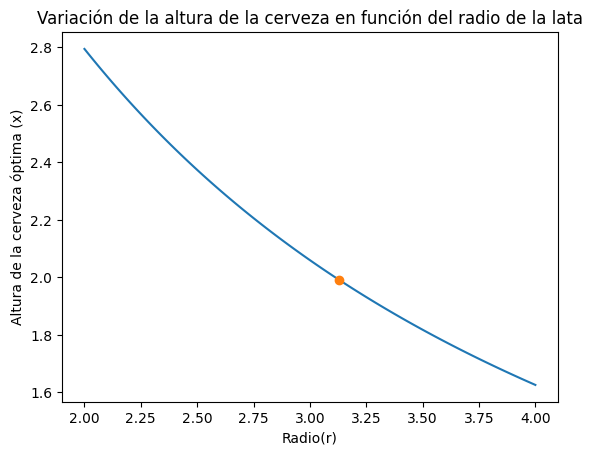

Sensibilidad con respecto a r= -0.8152198973482423


In [ ]:
var=(7.59433798805828*(r**2+0.387489716990493)**(0.5)-4.72737454728402)/(r**2)
m=np.linspace(2,4,100)
plt.plot(m,(7.59433798805828*(m**2+0.387489716990493)**(0.5)-4.72737454728402)/(m**2))
plt.plot(3.13,(7.59433798805828*((3.13)**2+0.387489716990493)**(0.5)-4.72737454728402)/((3.13)**2),'o')
plt.title("Variación de la altura de la cerveza en función del radio de la lata")
plt.xlabel("Radio(r)")
plt.ylabel("Altura de la cerveza óptima (x)")
plt.show()

derivative=var.diff(r)
yprime=sympy.lambdify(r,derivative,'numpy')
print("Sensibilidad con respecto a r=",(3.31/1.903)*yprime(3.31))

**Respecto a $h$:**

In [ ]:
h=sympy.Symbol('h')
m,r,d=15,3.31,1.01
sympy.simplify((-m + (m*(d*h*math.pi*r**2 + m))**(1/2))/(d*math.pi*r**2))

                                         0.5                    
0.656873909694668⋅(h + 0.431483333237559)    - 0.431483333237559

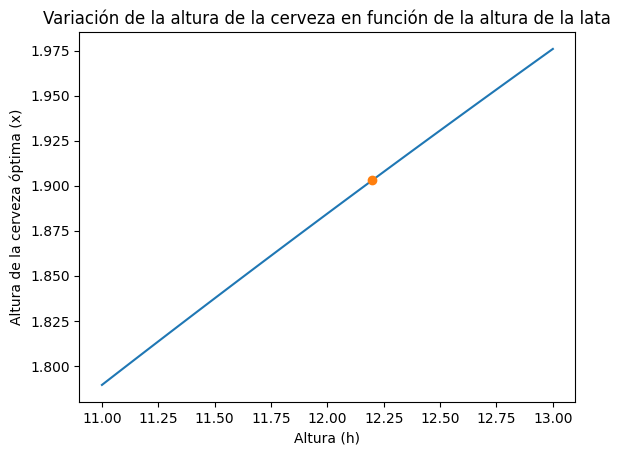

Sensibilidad con respecto a h= 0.59244205888189


In [ ]:
var=0.656873909694668*(h+0.431483333237559)**0.5-0.431483333237559
m=np.linspace(11,13,100)
plt.plot(m,0.656873909694668*(m+0.431483333237559)**0.5-0.431483333237559)
plt.plot(12.20,0.656873909694668*(12.20+0.431483333237559)**0.5-0.431483333237559,'o')
plt.title("Variación de la altura de la cerveza en función de la altura de la lata")
plt.xlabel("Altura (h)")
plt.ylabel("Altura de la cerveza óptima (x)")
plt.show()

derivative=var.diff(h)
yprime=sympy.lambdify(h,derivative,'numpy')
print("Sensibilidad con respecto a h=",(12.20/1.903)*yprime(12.20))

**Respecto a $m$:**

In [ ]:
m=sympy.Symbol('m')
h,r,d=12.20,3.31,1.01
sympy.simplify((-m + (m*(d*h*math.pi*r**2 + m))**(1/2))/(d*math.pi*r**2))

                                                                     0.5
-0.0287655555491706⋅m + 0.0287655555491706⋅(m⋅(m + 424.118351517524))   

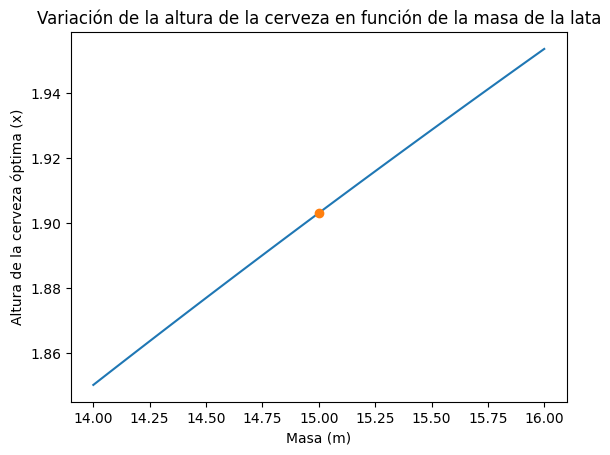

Sensibilidad con respecto a m= 0.40760994867412087


In [ ]:
var=-0.0287655555491706*m+0.0287655555491706*(m*(m+424.118351517524))**0.5
u=np.linspace(14,16,100)
plt.plot(u,-0.0287655555491706*u+0.0287655555491706*(u*(u+424.118351517524))**0.5)
plt.plot(15,-0.0287655555491706*(15)+0.0287655555491706*((15)*((15)+424.118351517524))**0.5,'o')
plt.title("Variación de la altura de la cerveza en función de la masa de la lata")
plt.xlabel("Masa (m)")
plt.ylabel("Altura de la cerveza óptima (x)")
plt.show()

derivative=var.diff(m)
yprime=sympy.lambdify(m,derivative,'numpy')
print("Sensibilidad con respecto a m=",(15/1.903)*yprime(15))

**Respecto a $\delta$:**

In [ ]:
d=sympy.Symbol('d')
m,h,r=15,12.20,3.31
sympy.simplify((-m + (m*(d*h*math.pi*r**2 + m))**(1/2))/(d*math.pi*r**2))

                                         0.5                    
2.30580520256009⋅(d + 0.0357211611942569)    - 0.435798166569935
────────────────────────────────────────────────────────────────
                               d                                

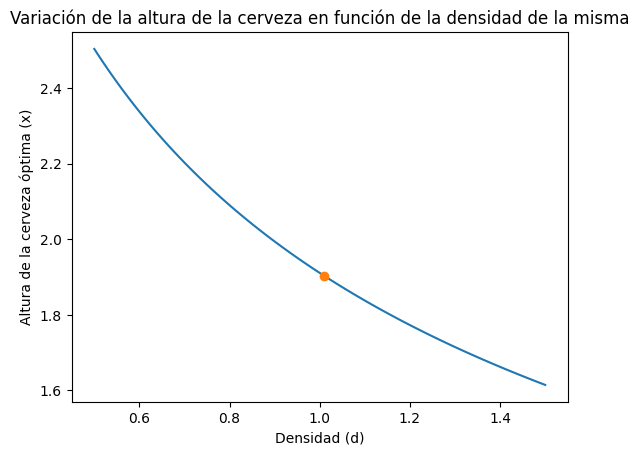

Sensibilidad con respecto a d= -0.40760994867412187


In [ ]:
var=(2.30580520256009*(d+0.0357211611942569)**0.5-0.435798166569935)/d
u=np.linspace(0.5,1.5,100)
plt.plot(u,(2.30580520256009*(u+0.0357211611942569)**0.5-0.435798166569935)/u)
plt.plot(1.01,(2.3058052025600*(1.01+0.0357211611942569)**0.5-0.435798166569935)/1.01,'o')
plt.title("Variación de la altura de la cerveza en función de la densidad de la misma")
plt.xlabel("Densidad (d)")
plt.ylabel("Altura de la cerveza óptima (x)")
plt.show()

derivative=var.diff(d)
yprime=sympy.lambdify(d,derivative,'numpy')
print("Sensibilidad con respecto a d=",(1.01/1.903)*yprime(1.01))

De aquí, concluimos que, con los datos obtenidos,


*   Si $r$ aumenta un $10\%$, $x_{arg~min}$ disminuye en un $8.15\%$.
*   Si $h$ aumenta en un $10\%$, $x_{arg~min}$ aumenta en un $5.92\%$.
*   Si $m$ aumenta en un $10\%$, $x_{arg~min}$ aumenta en un $4.07\%$.
*   Si $d$ aumenta un en $10\%$, $x_{arg~min}$ disminuye en un $4.07\%$.

Como $x_{arg~min}$ es un punto fijo, estas sensibilidades también aplican para la altura del centro de masa. Podemos concluir que este modelo es bastante robusto, y que la mayor variación de la respuesta se produce cuando se cambia el radio de la lata. \
Sin embargo, es claro que la geometría del cuerpo sí varía a medida que este gira un ángulo $\alpha$, dado que el contenido interno (cerveza) se acomoda de tal manera que su superficie sea normal al vector de la fuerza gravitacional. La suposición de que tal geometría no varía se puede realizar para ángulos pequeños de giro. No obstante, se puede observar que, bajo este modelo, el ángulo máximo al que se puede someter este cuerpo sin que la lata se caiga sería $\tan^{-1}(r/x)$. Para este ejemplo,

In [ ]:
m,h,r,d=15,12.20,3.31,1.01
print("Ángulo máximo=",180/math.pi*np.arctan(r/x), "grados")

Ángulo máximo= 60.10306292205179 grados


Y este valor de $\alpha\approx 60°$ es bastante grande. Por lo tanto, la inclinación del líquido jugaría un papel importante en el desplazamiento del centro de masa para este ángulo.

**Un segundo enfoque:** Ya se mencionaron anteriormente las limitaciones del anterior enfoque, en donde se asume que la geometría del sistema cerveza-lata no se ve afectado cuando este se gira un ángulo $\alpha$. Realizaremos un segundo enfoque, en el que se tiene en cuenta que la cerveza se alinea con la gravedad. En este caso, solo nos fue posible calcular numéricamente (no simbólicamente) la altura a la que el sistema se estabiliza en mayor medida (entendiéndose como que se requiere un mayor ángulo para que la lata se riegue; i.e. que la proyección del centro de masa quede por fuera del sistema). Para este caso, reduciremos el sistema a dos dimensiones (para el que la densidad volumétrica cambia por una densidad superficial). Inicialmente, calculamos el centro de masa del sistema para un ángulo de giro $\alpha$, y una altura inicial (vertical) del fluido $z$. Se distinguen dos casos, como se muestra en la siguiente imagen.
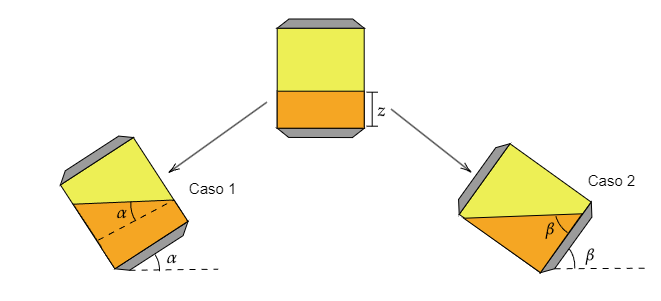


Note que para una altura $z$ fija, dependiendo del ángulo, ppuede tenerse tanto el caso $1$ como el caso $2$.

**En el caso 1:**\
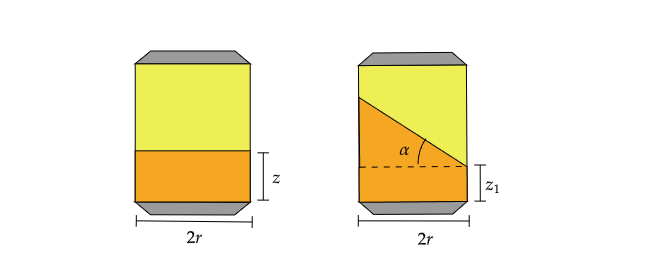

Teniendo en cuenta la anterior imagen, debemos tener que el área inicial debe ser igual al área final. Es decir,
$$2rz=A_{rectángulo}+A_{triángulo}=2rz_1+(2r)^2\tan(\alpha)/2$$
Entonces, $$z=z_1+r\tan(\alpha)$$
$$z_1=z-r\tan(\alpha)$$
Como además se debe dar que $z_1\geq 0$, entonces podemos concluir una condición necesaria y suficiente para que se cumple el caso 1. Es decir, $$z\geq r\tan(\alpha) ~\text{  o  }~ \alpha\leq \arctan(\frac{z}{r}).$$
Calculemos las coordenadas, del centro de masa, tomando como nuestro origen a la esquina inferior izquierda de la lata.\
$$P_{y,bebida}=\int \int \delta x ~dA=\int_{0}^{2r}\int_{0}^{z_1+2r\tan(\alpha)-tan(\alpha)x}\delta x~dy~dx=\int_{0}^{2r}\int_{0}^{z+r\tan(\alpha)-tan(\alpha)x}\delta x~dy~dx$$
$$P_{x,bebida}=\int \int \delta y ~dA=\int_{0}^{2r}\int_{0}^{z_1+2r\tan(\alpha)-tan(\alpha)x}\delta y~dy~dx=\int_{0}^{2r}\int_{0}^{z+r\tan(\alpha)-tan(\alpha)x}\delta y~dy~dx.$$
Usando cualquier sistema de cálculo simbólico, llegamos a que
$$P_{y,bebida}=(2r)^2\delta(\frac{z}{2}-\frac{r}{6}\tan{\alpha})$$
y $$P_{x,bebida}=\frac{\delta r}{3}(3z^2+r^2tan^2\alpha).$$
Como la masa total de la bebida no cambia, luego $m_{bebida}=2\delta r z$. Por ende, cuando $\alpha\leq \arctan(z/r),$
$$CM_{x,bebida}=\frac{P_{y,bebida}}{m_{bebida}}=\frac{r(3z-rtan(\alpha))}{3z}$$
y $$CM_{y,bebida}=\frac{P_{x,bebida}}{m_{bebida}}=\frac{3z^2+r^2\tan^2(\alpha)}{6z}$$
Por ende, el centro de masa total (dado que la lata es simétrica, como ya se había dicho), está dado por
\begin{align}CM_{x,total}&=\frac{m_{lata}CM_{x,lata}+m_{bebida}CM_{x,bebida}}{m_{lata}+m_{bebida}}\\
&=\frac{mr+2r\delta z \left(\frac{r(3z-rtan(\alpha))}{3z}\right)}{m_{lata}+m_{bebida}}\\
&=\frac{mr+\frac{2}{3}r^2\delta(3z-r\tan(\alpha))}{{m_{lata}+m_{bebida}}}
\end{align}
y
\begin{align}
CM_{y,total}&=\frac{m_{lata}CM_{y,lata}+m_{bebida}CM_{y,bebida}}{m_{lata}+m_{bebida}}\\
&= \frac{m\frac{h}{2}+(2rz\delta) \left(\frac{3z^2+r^2\tan^2(\alpha)}{6z} \right)}{m_{lata}+m_{bebida}}\\
&= \frac{m\frac{h}{2}+\frac{1}{3}r\delta \left({3z^2+r^2\tan^2(\alpha)}\right)}{m_{lata}+m_{bebida}}
\end{align}
Entonces, así como se hizo en la primera parte, el ángulo máximo $\alpha_0$ al que puede girarse este sistema debe satisfacer que $\tan(\alpha_0)=\frac{CM_x}{CM_y}$. Entonces, esta $\alpha\in \left[0,\pi/2\right]$ debe satisfacer
$$\tan(\alpha_0)=\frac{mr+\frac{2}{3}r^2\delta(3z-r\tan(\alpha_0))}{m\frac{h}{2}+\frac{1}{3}r\delta \left({3z^2+r^2\tan^2(\alpha_0)}\right)}$$
y además
$$tan(\alpha_0)\leq \frac{z}{r}.$$

**En el caso 2:**\
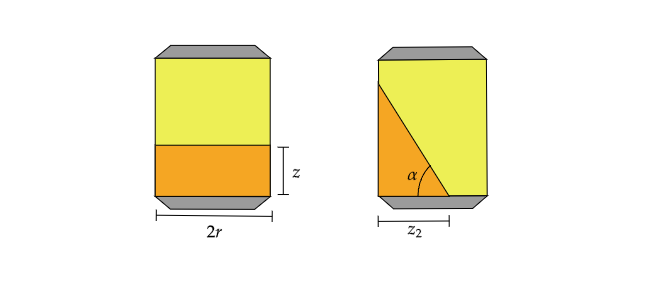

Teniendo en cuenta la anterior imagen. debe satidfacerse que la primera área sea igual a la segunda. Entonces, para cuando $tan(\alpha)\geq z/r$,
$$2rz=(z_2)^2\tan(\alpha)/2.$$
Así, $$z_2=2\sqrt{rz\cot(\alpha)}.$$
Calculando los momentos en $x$ y $y$,
$$P_{y,bebida}=\int \int \delta x ~dA=\int_{0}^{z_2}\int_{0}^{\tan(\alpha)(z_2-x)}\delta x~dy~dx$$
$$P_{x,bebida}=\int \int \delta y ~dA=\int_{0}^{z_2}\int_{0}^{\tan(\alpha)(z_2-x)}\delta y~dy~dx.$$
Usando cualquier sistema de cálculo simbólico, se llega a que
$$P_{y,bebida}=\frac{(z_2)^{3}\delta \tan(\alpha)}{6}$$
y
$$P_{x,bebida}=\frac{(z_2)^{3}\delta \tan^2(\alpha)}{6}.$$


Como la masa total de la bebida sigue siendo igual a $m_{bebida}=\delta 2rz=\frac{\delta (z_2)^2\tan(\alpha)}{2}$, entonces
$$CM_{x,bebida}=\frac{P_{y,bebida}}{m_{bebida}}=\frac{1}{3}z_2=\frac{2}{3}\sqrt{rz\cot(\alpha)}$$
y $$CM_{y,bebida}=\frac{P_{x,bebida}}{m_{bebida}}=\frac{1}{3}\tan(\alpha)z_2=\frac{2}{3}\sqrt{rz\tan(\alpha)}.$$
Por ende, el centro de masa total es
\begin{align}CM_{x,total}&=\frac{m_{lata}CM_{x,lata}+m_{bebida}CM_{x,bebida}}{m_{lata}+m_{bebida}}\\
&=\frac{mr+2r\delta z \left(\frac{2}{3}\sqrt{rz\cot(\alpha)}\right)}{m_{lata}+m_{bebida}}\\
&=\frac{mr+\frac{4}{3}r\delta z \sqrt{rz\cot(\alpha)}}{m_{lata}+m_{bebida}}\\
\end{align}
y
\begin{align}
CM_{y,total}&=\frac{m_{lata}CM_{y,lata}+m_{bebida}CM_{y,bebida}}{m_{lata}+m_{bebida}}\\
&= \frac{m\frac{h}{2}+(2rz\delta) \left(\frac{2}{3}\sqrt{rz\tan(\alpha)}\right)}{m_{lata}+m_{bebida}}\\
&= \frac{m\frac{h}{2}+\frac{4}{3}rz\delta\sqrt{rz\tan(\alpha)}}{m_{lata}+m_{bebida}}.\\
\end{align}
Concluimos entonces que al ángulo máximo $\alpha_0$ al que podría ser sometido el sistema satisface que $\tan(\alpha_0)=\frac{CM_{x,total}}{CM_{y,total}}$; en otras, palabras,
$$\tan(\alpha_0)=\frac{mr+\frac{4}{3}r\delta z \sqrt{rz\cot(\alpha_0)}}{m\frac{h}{2}+\frac{4}{3}r\delta z\sqrt{rz\tan(\alpha_0)}}$$
donde
$$tan(\alpha_0)\geq z/r.$$

Estamos buscando entonces el $z$ que maximiza el ángulo máximo al que puede girarse la lata, teniendo en cuenta las restricciones dadas. Lastimósamente, al despejar $tan(\alpha)$ por medio de softwares simbólicos, los resultados no son muy provechosos. Para solucionar este problema, tomaremos los datos supuestos y realizaremos cálculos numéricos, hallando el ángulo máximo al que puede ser llevado la lata con una altura de la bebida $z$, para $z$ variando entre $0~cm$ y $6~cm$, con pasos de $0.01cm$. El $z$ que tenga un ángulo máximo de giro mayor es el que se tomará para solucionar el problema de nuestro grupo de amigos.\
Recordemos que para este problema se supone $h=12.2~cm$, $r=3.31cm$ y $m=15.0~g$. Sin embargo, la densidad varía, dado que esta vez se supone superficial. Así,
$$\delta_{superficial}=\frac{m_{total}}{Área}=\frac{\pi r^2 z \delta_{volumétrica}}{(2r)z}=\frac{\pi r}{2}\delta_{volumétrica}.$$
En el código siguiente, resolvemos maximizando $y=tan(\alpha_0)$.

In [ ]:
h,r,m=12.2,3.31,15
d=math.pi*r/2*(1.01)
u=[0,0]
zmax=[0,0]
for z in np.arange(0,6,0.01):
  l=z/r
  f= lambda y: (m*r + 2/3*r**2*(d)*(3*z - r*y))/(m*h/2 +(1/3)*r*d*(3*z**2 + r**2*y**2))-y
  g= lambda y: (m*r+4/3*r*d*z*(r*z/y)**(1/2))/(m*h/2+4/3*r*d*z*(r*z*y)**(1/2))-y
  x1=fsolve(f,math.pi/4)[0]
  if x1<=l: u=[z,x1]
  else:
    x2=fsolve(g,math.pi/4)[0]
    u=[z,x2]
  if u[1]>zmax[1]: zmax=u
print(zmax)
alpha_max=np.arctan(zmax[1])
print(180/math.pi*alpha_max)

[3.56, 0.9303237577646599]
42.93277051814514


Por lo tanto, el mayor ángulo crítico se alcanza para $z=3.56$, en este caso $\tan(\alpha_0)=0.9303237577646599$, o, de otra forma, el ángulo máximo que soporta el sistema con estos datos es de aproximadamente $43°$. Nuestro grupo de amigos debería entonces tomarse la cerveza hasta tener una altura de la bebida de $3.56~cm$ para estabilizar la lata al máximo.

# **Referencias:**



*   [1] Bertran paradox: https://scipython.com/blog/bertrands-paradox/
*   [2] particiones y combinaciones de un número: https://stackoverflow.com/questions/10035752/elegant-python-code-for-integer-partitioning
* [3] Simulación de la estructura de un material poros de fibras: https://classroom.google.com/c/NTg5MDE0ODYxMzg4/m/NTg5NjE2NjcxNzc1/details
